In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/naini/Downloads/movie_data/movies.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
df1 = pd.read_csv("C:/Users/naini/Downloads/movie_data/ratings.csv")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
df1['userId'].nunique()

610

In [7]:
ratings = df1.groupby('movieId')['userId'].count()
max_ratings = ratings.idxmax()
movie_details = df[df['movieId'] == max_ratings]
print(movie_details[['movieId', 'title']])

     movieId                title
314      356  Forrest Gump (1994)


In [8]:
df2 =  pd.read_csv("C:/Users/naini/Downloads/movie_data/tags.csv")

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [10]:
matrix_movie_id = df[df['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = df2[df2['movieId'] == matrix_movie_id]['tag']
unique_matrix_tags = matrix_tags.unique()
print(unique_matrix_tags)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [11]:
merged_df = pd.merge(df2, df, on='movieId', how='inner')
matrix_tags = merged_df[merged_df['title'] == 'Matrix, The (1999)']['tag']
unique_matrix_tags = matrix_tags.unique()
print(unique_matrix_tags)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [12]:
terminator_movie_id = df[df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_ratings = df1[df1['movieId'] == terminator_movie_id]['rating']
average_rating = terminator_ratings.mean()
print(f'{average_rating:.2f}')

3.97


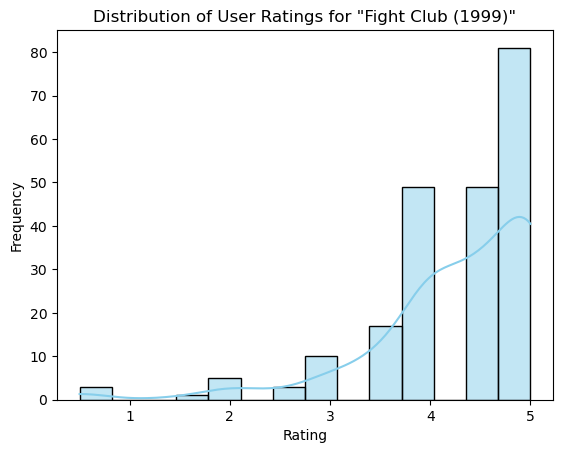

In [13]:
fight_club_movie_id = df[df['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = df1[df1['movieId'] == fight_club_movie_id]['rating']
sns.histplot(fight_club_ratings, kde=True, color='skyblue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [14]:
grouped_ratings = df1.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(grouped_ratings, df, on='movieId', how='inner')
movies_50 = merged_df[merged_df['count'] > 50]
print(movies_50)

      movieId  count      mean                             title  \
0           1    215  3.920930                  Toy Story (1995)   
1           2    110  3.431818                    Jumanji (1995)   
2           3     52  3.259615           Grumpier Old Men (1995)   
5           6    102  3.946078                       Heat (1995)   
6           7     54  3.185185                    Sabrina (1995)   
...       ...    ...       ...                               ...   
8287   106782     54  3.916667   Wolf of Wall Street, The (2013)   
8354   109374     52  3.778846  Grand Budapest Hotel, The (2014)   
8358   109487     73  3.993151               Interstellar (2014)   
8457   112852     59  4.050847    Guardians of the Galaxy (2014)   
8673   122904     54  3.833333                   Deadpool (2016)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                          

In [15]:
most_popular_movie = movies_50.loc[movies_50['mean'].idxmax()]
print(most_popular_movie[['movieId', 'title', 'mean']])

movieId                                 318
title      Shawshank Redemption, The (1994)
mean                               4.429022
Name: 277, dtype: object


In [16]:
sorted_movies = merged_df.sort_values(by = 'count', ascending = False)
top_5_popular_movies = sorted_movies.head(5)
top_5_popular_movies

,movieId,count,mean,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [17]:
sci_fi_movies = merged_df[merged_df['genres'].apply(lambda x: 'Sci-Fi' in x)]
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]
print(third_most_popular_sci_fi_movie[['movieId', 'title', 'count']])

movieId                     480
title      Jurassic Park (1993)
count                       238
Name: 418, dtype: object


In [18]:
df3 = pd.read_csv("C:/Users/naini/Downloads/movie_data/links.csv")

In [19]:
df3

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [21]:
merged_data = pd.merge(movies_50, df3, on = 'movieId', how = 'inner')

In [22]:
merged_data

,movieId,count,mean,title,genres,imdbId,tmdbId
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,6,102,3.946078,Heat (1995),Action|Crime|Thriller,113277,949.0
4,7,54,3.185185,Sabrina (1995),Comedy|Romance,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,54,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,993846,106646.0
432,109374,52,3.778846,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2278388,120467.0
433,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0
434,112852,59,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2015381,118340.0


In [48]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('section', attrs={'class' : 'ipc-page-section ipc-page-section--base ipc-page-section--tp-xl sc-b436540a-0 yKvDM'})
    return imdb_rating.text if imdb_rating else np.nan

In [49]:
for i in range(len(merged_data)):
    for j in merged_data["imdbId"]:
        merged_data["Imdb_rating"] = scrapper(j)
    break

In [23]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span',  attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [25]:
merged_data['imdb_rating'] = merged_data['imdbId'].apply(lambda x:scrapper(x))

In [27]:
merged_data.sort_values(by = "imdb_rating",ascending=False)

,movieId,count,mean,title,genres,imdbId,tmdbId,imdb_rating
53,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama,111161,278.0,9.3
117,858,192,4.289062,"Godfather, The (1972)",Crime|Drama,68646,238.0,9.2
146,1203,57,4.149123,12 Angry Men (1957),Drama,50083,389.0,9.0
364,7153,185,4.118919,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,167260,122.0,9.0
156,1221,129,4.259690,"Godfather: Part II, The (1974)",Crime|Drama,71562,240.0,9.0
...,...,...,...,...,...,...,...,...
70,420,59,2.720339,Beverly Hills Cop III (1994),Action|Comedy|Crime|Thriller,109254,306.0,5.5
28,153,137,2.916058,Batman Forever (1995),Action|Adventure|Comedy|Crime,112462,414.0,5.4
73,435,63,2.420635,Coneheads (1993),Comedy|Sci-Fi,106598,9612.0,5.4
30,160,57,2.877193,Congo (1995),Action|Adventure|Mystery|Sci-Fi,112715,10329.0,5.3


In [28]:
merged_data[merged_data["genres"].str.contains("Sci-Fi")].sort_values(by="",ascending=False)

KeyError: 'ratings'